# Proje: Aygaz Görüntü İşleme Kampı 🤖


📌 **Projenin Amacı ve Kapsamı**:

Bu proje, **görüntü işleme ve derin öğrenme** teknikleri kullanılarak farklı hayvan türlerini sınıflandırabilen bir yapay zeka modelinin geliştirilmesini amaçlamaktadır. Aygaz Görüntü İşleme Kampı'nda edinilen bilgiler ışığında, modelin doğruluk ve performans açısından optimize edilmesi hedeflenmiştir. 🐾📊

### Proje Kapsamı:

- **Hayvan Türleri**:  
  Proje, aşağıdaki 10 hayvan türünün sınıflandırılmasını kapsamaktadır:  
  **Leopar, Yunus, Aslan, Tilki, Geyik, Tavşan, At, Sincap, Yarasa ve Goril.** 🐆🐬🦊🦍

- **Veri Seti**:  
  Eğitim sürecinde hayvan görsellerinden oluşan geniş bir veri seti kullanılmıştır. Her bir görsel doğru şekilde etiketlenmiş ve modelin daha hassas çalışması sağlanmıştır. 🖼️📂

- **Görüntü İşleme Teknikleri**:  
  Görseller üzerinde kontrast iyileştirme, renk normalizasyonu ve gürültü azaltma gibi işlemler gerçekleştirilmiş, bu sayede modelin zorlu koşullardaki başarımı test edilmiştir. 🎨✨

Bu proje, derin öğrenme yöntemlerinin gerçek yaşam problemlerine uygulanabilirliğini gösteren değerli bir çalışma sunmayı hedeflemektedir. 🌍🤖

## 🛠️ Gerekli Kütüphaneler ve İşlevleri

### Python Standart Kütüphaneler
- **os**: Dosya ve klasör yönetimi işlemleri (ör. dosya yolu oluşturma, klasör içeriğini listeleme) için.
- **shutil**: Dosyaları ve klasörleri kopyalama, taşıma veya silme işlemleri için.

### Veri İşleme ve Manipülasyonu
- **numpy**: Sayısal hesaplamalar, matris işlemleri ve veri manipülasyonu için.
- **cv2 (OpenCV)**: Görüntü işleme, boyutlandırma ve dönüştürme işlemleri için.

### Makine Öğrenmesi ve Veri Bölme
- **train_test_split (scikit-learn)**: Veri setini eğitim ve test bölümlerine ayırmak için.
- **LabelEncoder (scikit-learn)**: Kategorik verileri sayısal değerlere dönüştürmek için.

### Derin Öğrenme ve Modelleme
- **tensorflow.keras.models.Sequential**: Katmanları sıralı bir şekilde ekleyerek model oluşturmak için.
- **tensorflow.keras.layers**:
  - **Conv2D**: Görüntü verileri için 2D konvolüsyon katmanı.
  - **MaxPooling2D**: Özellik haritalarını alt örnekleme (downsampling) yöntemiyle küçültmek için.
  - **Flatten**: Çok boyutlu verileri tek bir boyuta indirgemek için.
  - **Dense**: Tam bağlantılı katman (fully connected layer) oluşturmak için.
  - **Dropout**: Aşırı öğrenmeyi (overfitting) önlemek için nöronların rastgele kapatılması.
  - **BatchNormalization**: Eğitim sırasında katmanlardaki çıktıları normalize etmek için.
- **tensorflow.keras.optimizers.Adam**: Modeli optimize etmek için kullanılan bir optimizasyon algoritması.
- **tensorflow.keras.utils.to_categorical**: Sınıf etiketlerini tek sıcak kodlama (one-hot encoding) yöntemine dönüştürmek için.

### Veri Artırma
- **tensorflow.keras.preprocessing.image.ImageDataGenerator**: Görüntü veri artırma (augmentation) ve veri ön işleme işlemleri için.

### Görselleştirme
- **matplotlib.pyplot**: Eğitim sonuçlarını (ör. kayıp ve doğruluk) ve veri örneklerini görselleştirmek için.

Bu kütüphaneler, görüntü tabanlı derin öğrenme modelleri oluşturmak, veri artırma uygulamak ve modellerin performansını analiz etmek için gereklidir.


In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


## 📊**Veri Setinin Hazılanması**
10 Hayvan türünü veri setimizden seçip klasöre taşıyoruz.
1. **Değişkenler ve Parametreler**:

    * **image_size**: Görüntülerin boyutları (128, 128) olarak ayarlanır. 🖼️
    * **classes**: Sınıf isimleri (hayvan türleri) belirlenir. 🐆🦅
    * **images_per_class**: Her sınıf için kullanılacak görüntü sayısı (650). 🖼️
    * **source_dir**: Veri setinin bulunduğu kaynak dizin. 📂
    * **train_dir ve val_dir**: Eğitim ve doğrulama verilerinin depolanacağı dizinler. 📁


2. **Veri Hazırlama Fonksiyonu (prepare_dataset)**:

    * **validation_split**: Eğitim ve doğrulama verilerini ayıran oran (varsayılan %20). 📊


3. **Dizin Oluşturma**:

    * **train_dir** ve **val_dir** içinde her sınıf için uygun alt dizinler oluşturulur. 📂


4. **Resimlerin Seçilmesi ve Karıştırılması**:

    * Her sınıftan **650** kadar görüntü seçilir. 🖼️
    * Görüntüler rastgele karıştırılır (veri çeşitliliği sağlamak için). 🔀


5. **Eğitim ve Doğrulama Verisi Ayırma**:

    * Görüntüler, validation_split oranına göre eğitim ve doğrulama verilerine ayrılır. 📊


6. **Görüntüleri Eğitim ve Doğrulama Dizine Kopyalama**:

    * Seçilen eğitim ve doğrulama verileri uygun dizinlere kopyalanır. 📤📥


7. **Başarıyla Veri Seti Hazırlama**:

    * Veri seti başarıyla hazırlandığında kullanıcıya bilgi verilir. ✅


In [2]:
# Kaynak ve hedef dizinler
source_dir = "./Animals_with_Attributes2/JPEGImages"
target_dir = "./FitrelenmisDataSet"

# Seçilen sınıflar ve görüntü sayısı
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
images_per_class = 650

# Hedef klasörlerin oluşturulması
os.makedirs(target_dir, exist_ok=True)

for class_name in selected_classes:
    class_path = os.path.join(source_dir, class_name)
    target_path = os.path.join(target_dir, class_name)
    os.makedirs(target_path, exist_ok=True)

    # Hedef klasördeki mevcut dosya sayısını kontrol et
    existing_files = len(os.listdir(target_path))
    if existing_files >= images_per_class:
        print(f"{class_name} sınıfı zaten işlenmiş. Atlanıyor...")
        continue

    # Görüntüleri kopyala
    print(f"{class_name} sınıfı işleniyor...")
    for i, file_name in enumerate(os.listdir(class_path)):
        if i >= images_per_class:
            break
        full_file_name = os.path.join(class_path, file_name)
        if os.path.isfile(full_file_name):
            cv2.imwrite(os.path.join(target_path, file_name), cv2.imread(full_file_name))

print("Veri seti hazırlanması tamamlandı.")

collie sınıfı zaten işlenmiş. Atlanıyor...
dolphin sınıfı zaten işlenmiş. Atlanıyor...
elephant sınıfı zaten işlenmiş. Atlanıyor...
fox sınıfı zaten işlenmiş. Atlanıyor...
moose sınıfı zaten işlenmiş. Atlanıyor...
rabbit sınıfı zaten işlenmiş. Atlanıyor...
sheep sınıfı zaten işlenmiş. Atlanıyor...
squirrel sınıfı zaten işlenmiş. Atlanıyor...
giant+panda sınıfı zaten işlenmiş. Atlanıyor...
polar+bear sınıfı zaten işlenmiş. Atlanıyor...
Veri seti hazırlanması tamamlandı.


## 🔄**GÖRSELLERİN YÜKLENMESİ 🧩**
Bu adımda, görselleri yükleyip uygun şekilde etiketliyoruz, böylece modelin eğitiminde kullanılacak hale getiriyoruz. 🚀

📌 İşlemler:
1. **Görsel Yükleme**: cv2.imread() ile her bir sınıfın görselleri okunur. 📂
2. **Normalizasyon**: Görseller, modelin daha verimli öğrenmesi için 0-1 aralığına normalleştirilir (img = img / 255.0). ⚖️
3. **Etiketleme**: Her görsel, ait olduğu sınıfın adı ile etiketlenir. 🏷️

📍 Sonuçlar:
* **X**: Ön işlenmiş tüm görseller.
* **y**: Her görselin doğru sınıf etiketi.

In [3]:
def load_and_process_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    img_resized = cv2.resize(img, image_size)
                    img_normalized = img_resized / 255.0
                    images.append(img_normalized)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

# Veri setini yükleme
X, y = load_and_process_images(target_dir)
print(f"Veri kümesi boyutu: {X.shape}")


Veri kümesi boyutu: (6500, 128, 128, 3)


## 🏷️ Etiket Kodlama ve Veri Setini Ayırma

### 🧩 **1. Etiket Kodlama**
- **`LabelEncoder`**: Kategorik sınıfları sayısal değerlere dönüştürür.
- **`to_categorical`**: Tek sıcak kodlama (one-hot encoding) yöntemiyle etiketleri çoklu sınıf biçimine dönüştürür.

```python
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [4]:
# Etiket kodlama
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=42)
print(f"Eğitim veri boyutu: {X_train.shape}, Test veri boyutu: {X_test.shape}")


Eğitim veri boyutu: (4550, 128, 128, 3), Test veri boyutu: (1950, 128, 128, 3)


## 🛠️ **Veri Artırma ile Eğitim ve Doğrulama Veri Akışı**

🔄 **Eğitim Verisi Akışı**:  
`ImageDataGenerator` ile döndürme, kaydırma, zoom, parlaklık değişimi ve yatay çevrim gibi veri artırma işlemleri uygulanır. Bu, modelin daha güçlü ve genellenebilir olmasını sağlar.

🔄 **Doğrulama Verisi Akışı**:  
Doğrulama verileri için de veri artırma işlemleri uygulanabilir, böylece modelin genellenebilirliği doğrulama setinde test edilir.

🚀 **Sonuç**:  
Veri artırma, modelin farklı veri çeşitliliğiyle eğitilmesine ve daha iyi performans göstermesine yardımcı olur. Ayrıca, aşırı uyum (overfitting) riski azaltılır.


In [5]:
# Veri artırma işlemi
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)


## 🧠 **Model Tanımlama ve Derleme**

Bu kod, bir derin öğrenme modelini tanımlayıp derler. Modelin özellikleri ve katmanları aşağıda açıklanmıştır:

### 🏗️ **Modelin Yapısı**
1. **Konvolüsyonel Katmanlar**:
   - **4 Konvolüsyon Bloğu**: Her biri sırayla:
     - **`Conv2D`**: Görsel özellikleri yakalamak için 32, 64, 128 ve 256 filtreli katmanlar.
     - **`BatchNormalization`**: Eğitim sırasında verilerin normalize edilmesi.
     - **`MaxPooling2D`**: Özellik haritalarını küçültme ve daha anlamlı hale getirme.
     - **`Dropout`**: Aşırı uyumu (overfitting) önlemek için nöronların rastgele kapatılması.

2. **Tam Bağlantılı Katmanlar**:
   - **`Flatten`**: Çok boyutlu çıktıları tek boyutlu bir vektöre dönüştürme.
   - **`Dense (512)`**: Tam bağlantılı katman, daha karmaşık ilişkileri öğrenmek için.
   - **`Dropout (0.5)`**: Aşırı uyumu azaltmak için %50 nöron kapatma.
   - **`Dense (len(np.unique(y))`**: Çıkış katmanı, sınıf sayısı kadar nöron ve **`softmax`** aktivasyonu ile.

### ⚙️ **Modelin Derlenmesi**
- **Optimizasyon**: **`Adam`** (Öğrenme oranı: `0.001`) hızlı ve etkili öğrenme sağlar.
- **Kayıp Fonksiyonu**: **`categorical_crossentropy`** çok sınıflı sınıflandırma için kullanılır.
- **Metriği**: **`accuracy`** doğruluk oranını izler.

### 📊 **Modelin Özeti**
- Toplam parametreler ve her katmanın yapılandırması **`model.summary()`** ile gösterilir.

🚀 **Sonuç**: Bu model, çok sınıflı görüntü sınıflandırma için güçlü bir yapıya sahiptir. **Konvolüsyonel katmanlar**, görsel özellikleri öğrenirken, tam bağlantılı katmanlar nihai sınıflandırmayı gerçekleştirir. 🎯


In [6]:
# Modelin tanımlanması
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Modelin derlenmesi
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/subozkurt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,786,634 (33.52 MB)

 Trainable params: 8,784,650 (33.51 MB)

 Non-trainable params: 1,984 (7.75 KB)

## 🎓 **Modelin Eğitimi**

Model, veri artırma ve doğrulama verilerini kullanarak eğitilir. Aşağıda eğitim sürecinin detayları verilmiştir:

### ⚙️ **Eğitim Parametreleri**
- **Veri Akışı**: 
  - Eğitim verileri, **`datagen.flow`** kullanılarak `ImageDataGenerator` ile artırılır ve mini-batch'ler halinde modele beslenir.
- **Doğrulama Verileri**: 
  - Model, her epoch sonunda **`validation_data`** kullanarak doğrulama verisi üzerindeki performansını ölçer.
- **Epoch Sayısı**: 
  - Eğitim, **30 epoch** boyunca gerçekleştirilir.
- **Adım Sayısı**: 
  - **`steps_per_epoch`**: Her epoch'ta kaç mini-batch işleneceği, **`len(X_train) // 32`** ile hesaplanır.
  - **Batch Size**: Her seferde 32 görüntü işlenir.

### 📊 **Eğitim Sürecinin Çıkışı**
- **Loss** ve **Accuracy** değerleri:
  - Her epoch'ta eğitim ve doğrulama verileri için kayıp (**loss**) ve doğruluk (**accuracy**) değerleri hesaplanır.
- Eğitim geçmişi, **`history`** değişkenine kaydedilir. Bu, sonuçları görselleştirmek için kullanılabilir.

### 🚀 **Sonuç**
Bu eğitim süreci, modeli görsellerden öğrenmeye zorlayarak doğruluğunu artırır. Veri artırma ile model, daha çeşitli veri görür ve genelleme yeteneği güçlenir. 🎯


In [7]:
import os
from tensorflow.keras.models import load_model

# Model dosyasının yolu
model_path = 'trained_model.h5'

# Model dosyasının olup olmadığını kontrol et
if os.path.exists(model_path):
    # Dosya mevcutsa, kullanıcıya modelin yeniden eğitilmesini isteyip istemediğini sor
    user_input = input(f"Daha önce eğitilmiş model bulundu: {model_path}. Modeli yeniden eğitmek ister misiniz? (Evet/Hayır): ").strip().lower()

    if user_input == 'evet':
        # Modeli oluştur ve eğit
        history = model.fit(
            datagen.flow(X_train, y_train, batch_size=32),
            validation_data=(X_test, y_test),
            epochs=30,
            steps_per_epoch=len(X_train) // 32
        )
        
        # Eğitilen modeli kaydet
        model.save(model_path)
        print("Model başarıyla eğitildi ve kaydedildi!")
    else:
        # Modeli yükle
        model = load_model(model_path)
        print("Daha önce eğitilmiş model yüklendi!")
else:
    # Eğer model dosyası yoksa, yeni model oluşturulup eğitilecek
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_test, y_test),
        epochs=30,
        steps_per_epoch=len(X_train) // 32
    )
    
    # Eğitilen modeli kaydet
    model.save(model_path)
    print("Model başarıyla eğitildi ve kaydedildi!")


Daha önce eğitilmiş model bulundu: trained_model.h5. Modeli yeniden eğitmek ister misiniz? (Evet/Hayır):  Evet


Epoch 1/30


/Users/subozkurt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 318ms/step - accuracy: 0.2704 - loss: 2.5329 - val_accuracy: 0.0969 - val_loss: 10.2803
Epoch 2/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.3750 - loss: 1.9413

2024-12-20 18:48:04.367301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/subozkurt/anaconda3/envs/Tensorflow/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3750 - loss: 0.9775 - val_accuracy: 0.0969 - val_loss: 9.9979
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 325ms/step - accuracy: 0.3241 - loss: 2.1320 - val_accuracy: 0.1600 - val_loss: 3.7232
Epoch 4/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.3125 - loss: 1.7699

2024-12-20 18:48:54.824383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3125 - loss: 0.8912 - val_accuracy: 0.1569 - val_loss: 3.7187
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 49s 345ms/step - accuracy: 0.3905 - loss: 1.8509 - val_accuracy: 0.2169 - val_loss: 2.8081
Epoch 6/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 51s 366ms/step - accuracy: 0.4375 - loss: 1.6294

2024-12-20 18:49:48.260820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4375 - loss: 0.8204 - val_accuracy: 0.2154 - val_loss: 2.8333
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 51s 357ms/step - accuracy: 0.4579 - loss: 1.6140 - val_accuracy: 0.2549 - val_loss: 2.4480
Epoch 8/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 44s 316ms/step - accuracy: 0.5000 - loss: 1.5993

2024-12-20 18:50:43.385239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5000 - loss: 0.8053 - val_accuracy: 0.2687 - val_loss: 2.3719
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.4565 - loss: 1.5947 - val_accuracy: 0.4456 - val_loss: 1.7335
Epoch 10/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 46s 330ms/step - accuracy: 0.4062 - loss: 2.0396

2024-12-20 18:51:34.186055: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4062 - loss: 1.0270 - val_accuracy: 0.4456 - val_loss: 1.7249
Epoch 11/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 326ms/step - accuracy: 0.4875 - loss: 1.4981 - val_accuracy: 0.3744 - val_loss: 1.9384
Epoch 12/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 42s 302ms/step - accuracy: 0.5625 - loss: 1.1786

2024-12-20 18:52:24.916671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5625 - loss: 0.5934 - val_accuracy: 0.3621 - val_loss: 1.9730
Epoch 13/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 323ms/step - accuracy: 0.5000 - loss: 1.4631 - val_accuracy: 0.5062 - val_loss: 1.4979
Epoch 14/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 40s 288ms/step - accuracy: 0.5938 - loss: 1.2434

2024-12-20 18:53:15.276527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5938 - loss: 0.6261 - val_accuracy: 0.5000 - val_loss: 1.5327
Epoch 15/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 45s 317ms/step - accuracy: 0.5335 - loss: 1.3482 - val_accuracy: 0.5328 - val_loss: 1.4703
Epoch 16/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 43s 311ms/step - accuracy: 0.4375 - loss: 1.8246

2024-12-20 18:54:04.704909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4375 - loss: 0.9187 - val_accuracy: 0.5441 - val_loss: 1.4439
Epoch 17/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 319ms/step - accuracy: 0.5410 - loss: 1.3246 - val_accuracy: 0.5441 - val_loss: 1.3575
Epoch 18/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.6562 - loss: 1.1084

2024-12-20 18:54:54.434873: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6562 - loss: 0.5581 - val_accuracy: 0.5323 - val_loss: 1.3895
Epoch 19/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.5543 - loss: 1.3177 - val_accuracy: 0.5077 - val_loss: 1.5060
Epoch 20/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 40s 290ms/step - accuracy: 0.5625 - loss: 1.3512

2024-12-20 18:55:45.024299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5625 - loss: 0.6803 - val_accuracy: 0.5077 - val_loss: 1.4933
Epoch 21/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 46s 322ms/step - accuracy: 0.5668 - loss: 1.2563 - val_accuracy: 0.6159 - val_loss: 1.1509
Epoch 22/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.5625 - loss: 1.6438

2024-12-20 18:56:35.220604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5625 - loss: 0.8277 - val_accuracy: 0.6195 - val_loss: 1.1343
Epoch 23/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 47s 328ms/step - accuracy: 0.5863 - loss: 1.2258 - val_accuracy: 0.5703 - val_loss: 1.3622
Epoch 24/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 43s 309ms/step - accuracy: 0.5625 - loss: 1.0419

2024-12-20 18:57:26.181093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.5625 - loss: 0.5246 - val_accuracy: 0.5677 - val_loss: 1.3810
Epoch 25/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 48s 332ms/step - accuracy: 0.6109 - loss: 1.1451 - val_accuracy: 0.6108 - val_loss: 1.1378
Epoch 26/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.6875 - loss: 0.9494

2024-12-20 18:58:18.152545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6875 - loss: 0.4781 - val_accuracy: 0.6144 - val_loss: 1.1121
Epoch 27/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 48s 332ms/step - accuracy: 0.5984 - loss: 1.1394 - val_accuracy: 0.4544 - val_loss: 1.7048
Epoch 28/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 41s 293ms/step - accuracy: 0.5938 - loss: 1.0768

2024-12-20 18:59:09.953280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5938 - loss: 0.5422 - val_accuracy: 0.4779 - val_loss: 1.6235
Epoch 29/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 48s 336ms/step - accuracy: 0.6230 - loss: 1.1106 - val_accuracy: 0.6667 - val_loss: 0.9601
Epoch 30/30
  1/142 ━━━━━━━━━━━━━━━━━━━━ 45s 320ms/step - accuracy: 0.5000 - loss: 1.4013

2024-12-20 19:00:02.866365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5000 - loss: 0.7056 - val_accuracy: 0.6631 - val_loss: 0.9654


Model başarıyla eğitildi ve kaydedildi!


## 📊 **Model Performansının Test Seti Üzerinde Değerlendirilmesi**

### 🧑‍🏫 **Test Seti Üzerinde Değerlendirme**
Model, test verisi üzerinde değerlendirilir ve doğruluk (accuracy) ile kayıp (loss) hesaplanır.

```python
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.6553 - loss: 0.9503
Test Doğruluğu: 66.31%


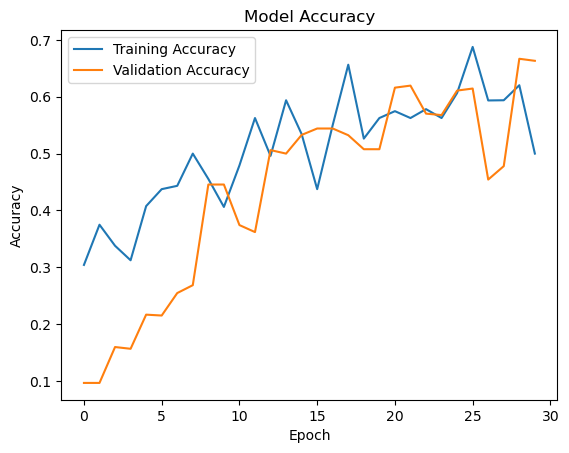

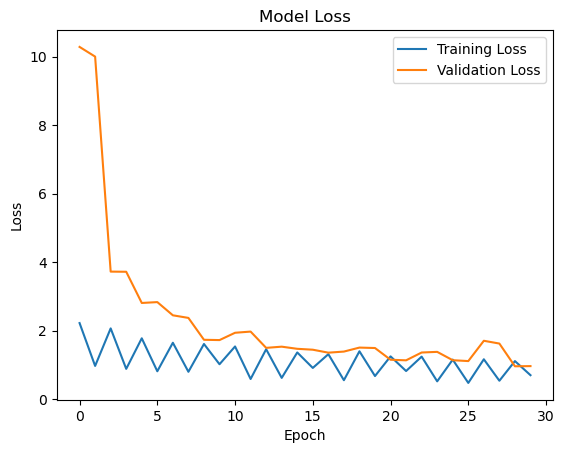

In [8]:
# Test seti üzerinde model performansı
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")

# Eğitim ve doğrulama sonuçlarını görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## **🖼️Görsellerin Manipüle Edilmesi ve Test Sonuçlarının Değerlendirilmesi**

Bu adımda görseller üzerinde manipülasyon yaparak modelin performansını değerlendirdik:

- **Kontrast Artırma**: Görsellerin kontrastı artırılarak daha belirgin hale getirildi. 🎨
- **Döndürme**: Görseller saat yönünde 90 derece döndürüldü. 🔄
- **Manipüle Edilmiş Görsellerin Testi**: Görsellerde yapılan bu değişiklikler modelin doğruluğunu nasıl etkilediğini görmek için test setinde model değerlendirildi. 📊

📌 **Amaç**: Modelin manipüle edilmiş görseller üzerindeki dayanıklılığını ve performansını analiz etmek.

61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.2449 - loss: 3.3441
Manipüle Edilmiş Test Doğruluğu (Kontrast + Döndürme): 24.56%


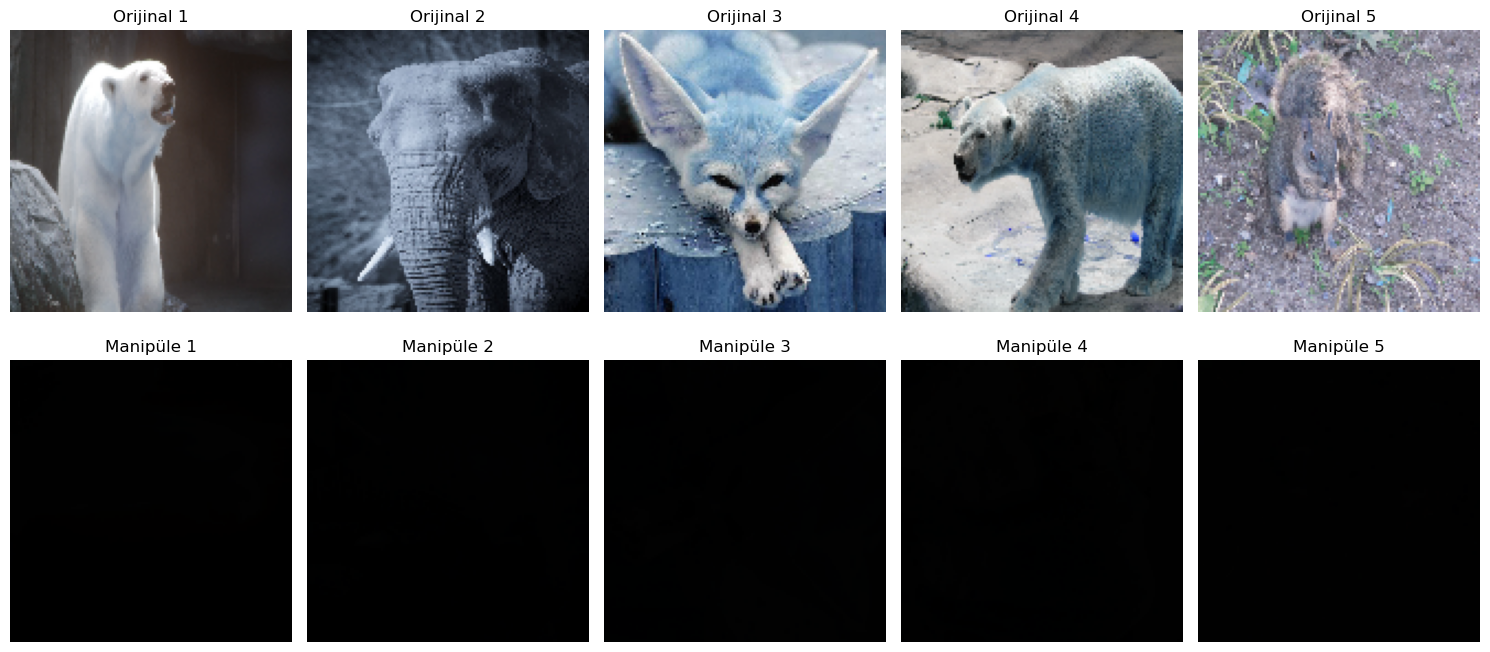

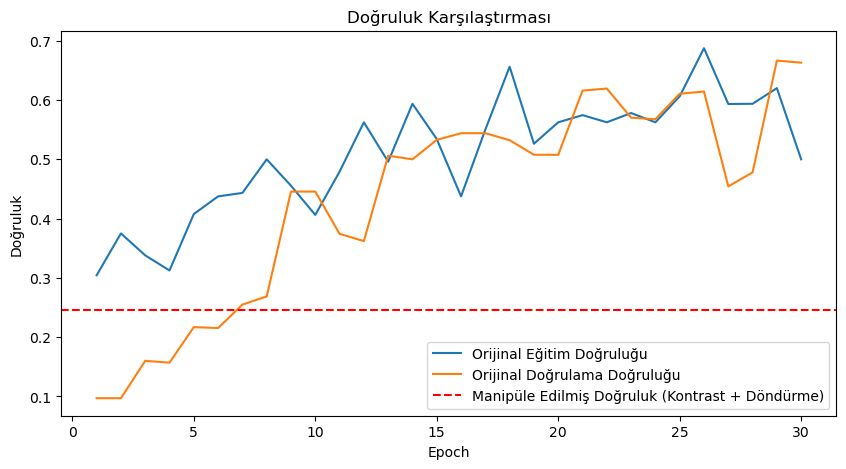

In [9]:
# Manipülasyon fonksiyonu
def manipulate_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=2.0, beta=0)  # Kontrast artırma
        manipulated = cv2.rotate(manipulated, cv2.ROTATE_90_CLOCKWISE)  # Döndürme
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

# Manipüle edilmiş test verisini oluşturma
X_test_manipulated = manipulate_images(X_test)

# Model ile değerlendirme
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Doğruluğu (Kontrast + Döndürme): {manipulated_accuracy * 100:.2f}%")

# Manipüle edilmiş görüntülerden birkaç örnek alalım
sample_images = X_test[:5]
sample_manipulated = X_test_manipulated[:5]

# Görsellerin karşılaştırılması için subplot düzeni
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Orijinal ve manipüle edilmiş görselleri yan yana göstermek için
for i in range(5):
    axes[0, i].imshow(sample_images[i])
    axes[0, i].set_title(f"Orijinal {i+1}")
    axes[0, i].axis('off')  # Eksenleri kaldır

    axes[1, i].imshow(sample_manipulated[i])
    axes[1, i].set_title(f"Manipüle {i+1}")
    axes[1, i].axis('off')  # Eksenleri kaldır

plt.tight_layout()
plt.show()

# Eğitim ve manipüle edilmiş doğrulukları görselleştirme
epochs = range(1, len(history.history['accuracy']) + 1)

# Eğitim ve manipüle edilmiş doğrulukları grafikle gösterme
plt.figure(figsize=(10, 5))
plt.plot(epochs, history.history['accuracy'], label='Orijinal Eğitim Doğruluğu')
plt.plot(epochs, history.history['val_accuracy'], label='Orijinal Doğrulama Doğruluğu')

# Manipüle edilmiş doğruluk tek bir değer olduğu için sabit bir çizgiyle gösterilir
plt.axhline(y=manipulated_accuracy, color='r', linestyle='--', label='Manipüle Edilmiş Doğruluk (Kontrast + Döndürme)')

plt.title('Doğruluk Karşılaştırması')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


## **🎨Renk Sabitliği Uygulaması ve Model Performansı**

Bu adımda manipüle edilmiş görsellere renk sabitliği uygulayarak modelin performansını değerlendirdik:

- **Renk Sabitliği**: Görsellerin renk dengesi ayarlandı, her renk kanalındaki ortalama değerlere göre ölçeklendirme yapıldı. 🌈
- **Amaç**: Manipülasyon sonrası renk bozulmalarını düzelterek modelin doğruluğunu artırmak. 🔧
- **Sonuçların Karşılaştırılması**: Renk sabitliği uygulanmış test seti ile model performansı yeniden ölçüldü. 📈

📌 **Sonuç**: Bu adım, manipülasyondan etkilenen görseller üzerinde renk sabitliğinin etkisini analiz etmeyi amaçlar.

61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.1464 - loss: 6.9749
Renk Sabitliği Uygulanmış Test Doğruluğu (Manipüle Edilmiş): 14.41%


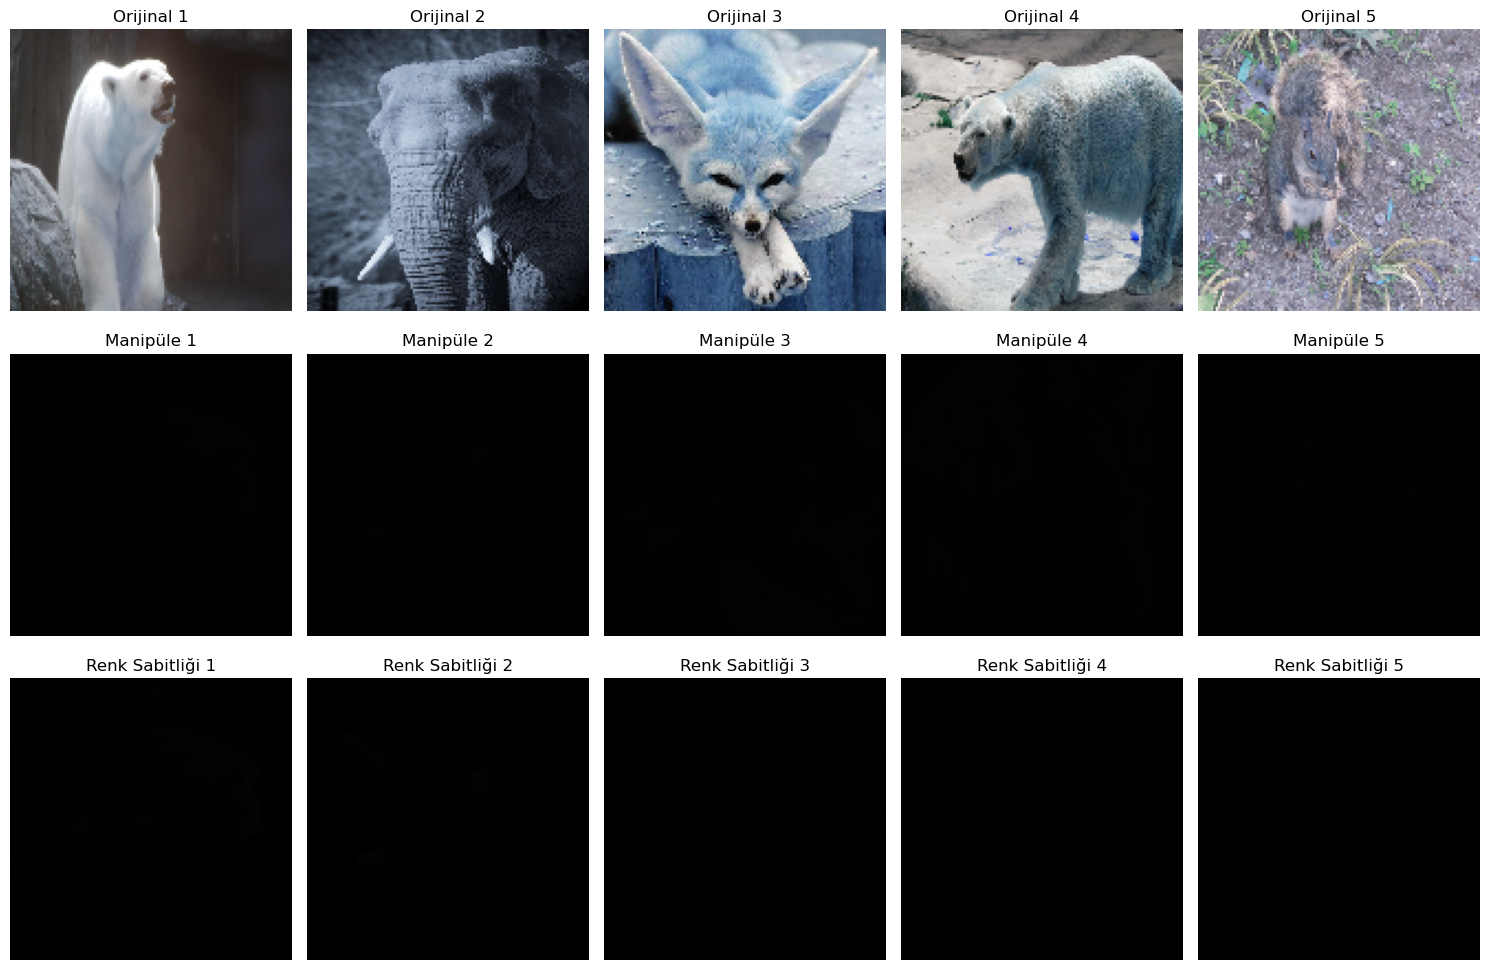

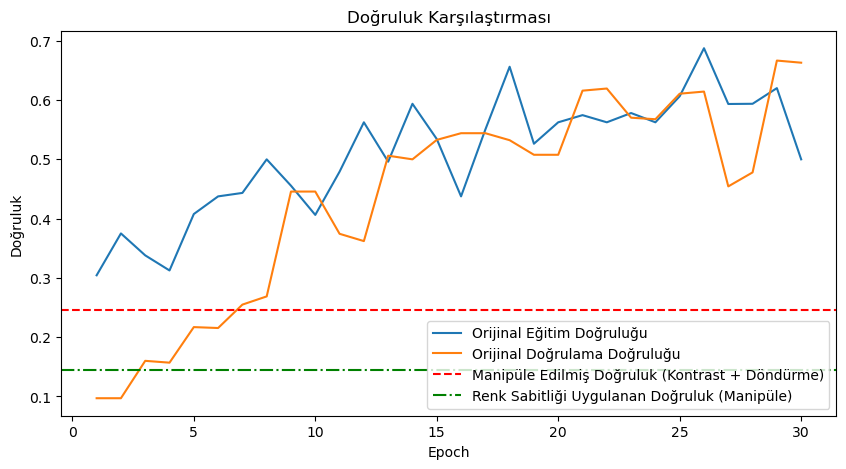

In [10]:
# Renk Sabitliği Uygulamak için Fonksiyon
def apply_color_correction(image):
    avg_b, avg_g, avg_r = cv2.mean(image)[:3]
    scale_b = 1.0 / (avg_b + 1e-5)
    scale_g = 1.0 / (avg_g + 1e-5)
    scale_r = 1.0 / (avg_r + 1e-5)
    corrected_image = image * np.array([scale_b, scale_g, scale_r])
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
    return corrected_image

# Manipüle edilmiş görüntülere renk sabitliği uygulama
X_test_corrected = np.array([apply_color_correction(img) for img in X_test_manipulated])

# Modeli renk sabitliği uygulanmış test setiyle değerlendirme
corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Doğruluğu (Manipüle Edilmiş): {corrected_accuracy * 100:.2f}%")

# Görselleştirme: Manipüle Edilmiş ve Renk Sabitliği Uygulanan Görselleri Karşılaştırma
sample_images = X_test[:5]
sample_manipulated = X_test_manipulated[:5]
sample_corrected = X_test_corrected[:5]

# 3 satır 5 sütunluk bir düzenle görselleri karşılaştırma
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Orijinal, Manipüle Edilmiş ve Renk Sabitliği Uygulanan Görselleri Göstermek
for i in range(5):
    axes[0, i].imshow(sample_images[i])
    axes[0, i].set_title(f"Orijinal {i+1}")
    axes[0, i].axis('off')  # Eksenleri kaldır

    axes[1, i].imshow(sample_manipulated[i])
    axes[1, i].set_title(f"Manipüle {i+1}")
    axes[1, i].axis('off')  # Eksenleri kaldır

    axes[2, i].imshow(sample_corrected[i])
    axes[2, i].set_title(f"Renk Sabitliği {i+1}")
    axes[2, i].axis('off')  # Eksenleri kaldır

plt.tight_layout()
plt.show()

# Eğitim ve Manipüle Edilmiş, Renk Sabitliği Uygulanan Doğrulukları Karşılaştırma
epochs = range(1, len(history.history['accuracy']) + 1)

# Eğitim, manipüle edilmiş ve renk sabitliği uygulanmış doğrulukları grafikle gösterme
plt.figure(figsize=(10, 5))
plt.plot(epochs, history.history['accuracy'], label='Orijinal Eğitim Doğruluğu')
plt.plot(epochs, history.history['val_accuracy'], label='Orijinal Doğrulama Doğruluğu')

# Manipüle edilmiş doğruluk ve renk sabitliği için sabit çizgiler
plt.axhline(y=manipulated_accuracy, color='r', linestyle='--', label='Manipüle Edilmiş Doğruluk (Kontrast + Döndürme)')
plt.axhline(y=corrected_accuracy, color='g', linestyle='-.', label='Renk Sabitliği Uygulanan Doğruluk (Manipüle)')

plt.title('Doğruluk Karşılaştırması')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


## 🎨 **Renk Sabitliği Uygulama ve Model Performansı**

### 🧑‍🏫 **Gray World Algoritması ile Renk Sabitliği**
**Gray World Algoritması**, her renk kanalının (kırmızı, yeşil, mavi) ortalamasını kullanarak görselin renk dengesini düzeltir. Bu algoritma, görüntülerde renk sapmalarını giderir ve daha tutarlı renkler elde edilmesini sağlar.


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.0333 - loss: 8.8179
Renk Sabitliği Uygulanmış Test Doğruluğu: 3.59%


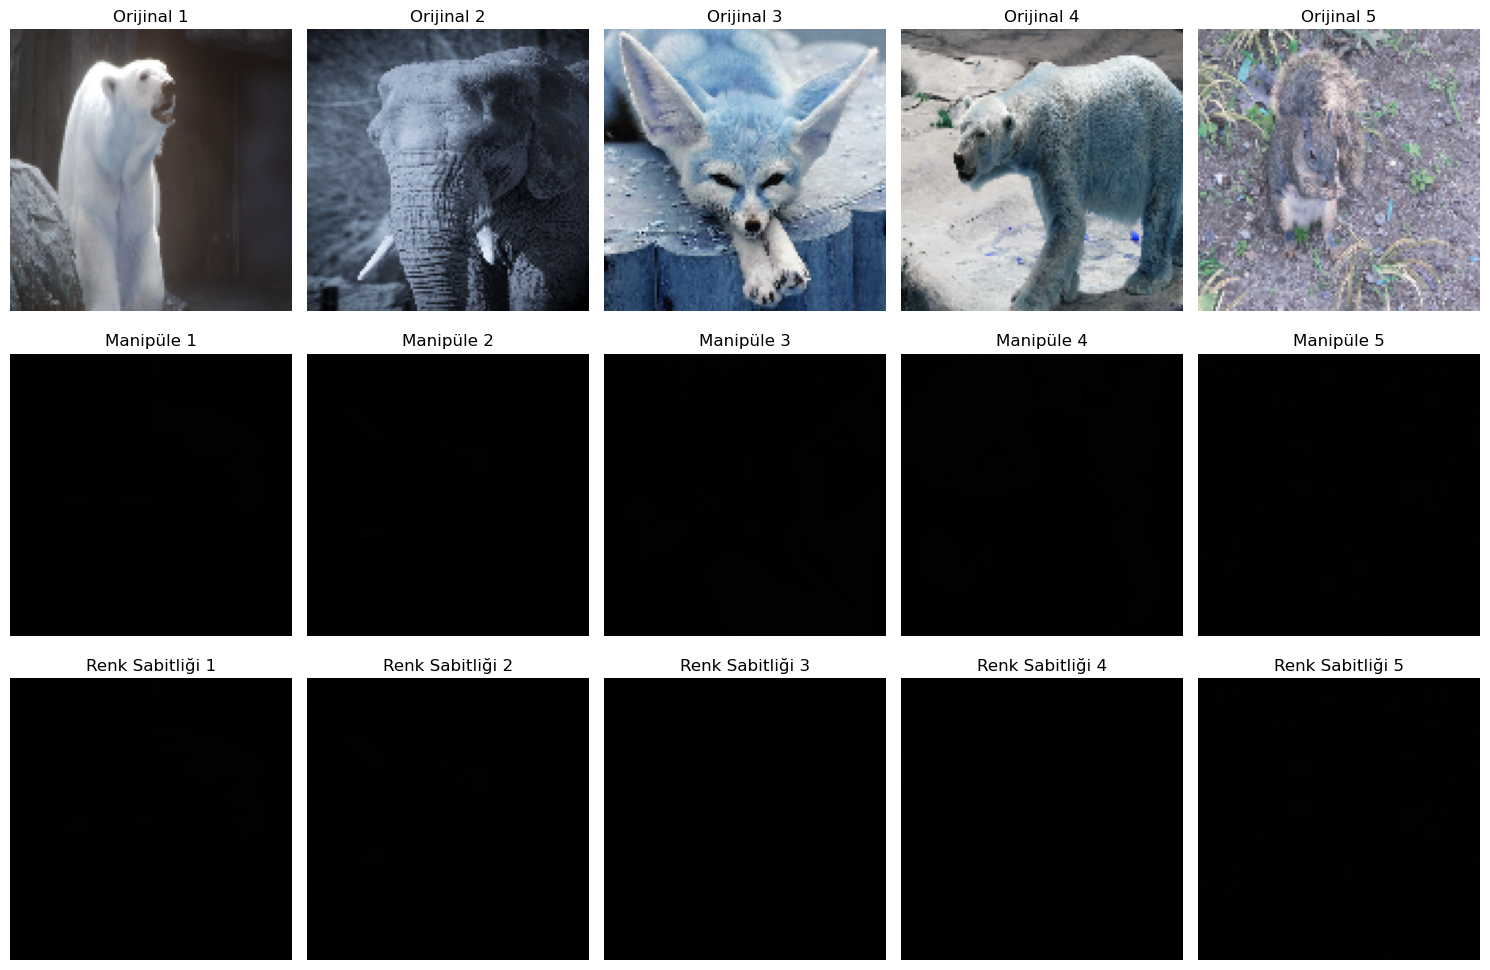

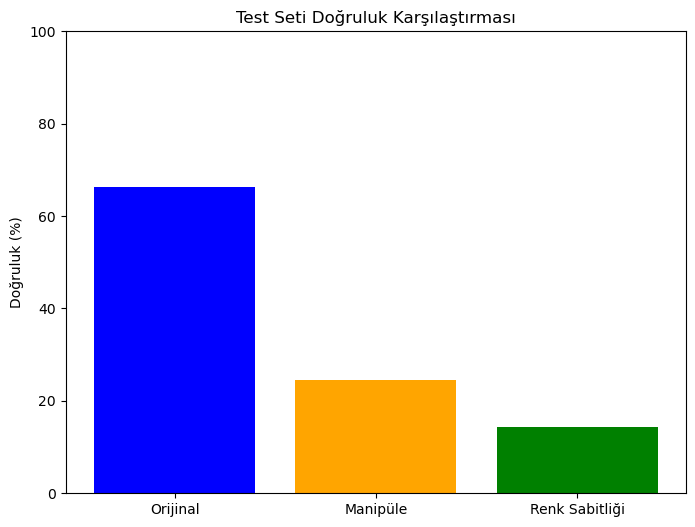

In [11]:
# Gray World Algoritması (Renk Sabitliği Uygulama)
def gray_world_algorithm(image):
    avg_b, avg_g, avg_r = cv2.mean(image)[:3]
    gray_value = (avg_b + avg_g + avg_r) / 3
    # Sıfıra bölme hatasını önlemek için kontrol ekleniyor
    scaling_factors = np.array([
        gray_value / (avg_b + 1e-5),  # Sıfıra bölmeyi önlemek için küçük bir değer ekleniyor
        gray_value / (avg_g + 1e-5),
        gray_value / (avg_r + 1e-5)
    ])
    corrected_image = image * scaling_factors  # Her kanal için ayrı ölçekleme
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
    return corrected_image

# Manipüle Edilmiş Test Setini Oluşturma
def manipulate_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=2.0, beta=0)  # Kontrast artırma
        manipulated = cv2.rotate(manipulated, cv2.ROTATE_90_CLOCKWISE)  # Döndürme
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

# X_test_manipulated oluşturuluyor
X_test_manipulated = manipulate_images(X_test)

# Manipüle edilmiş test setine renk sabitliği uygulama
X_test_corrected = np.array([gray_world_algorithm(img) for img in X_test_manipulated])

# Modeli renk sabitliği uygulanmış test setiyle değerlendirme
corrected_loss_v2, corrected_accuracy_v2 = model.evaluate(X_test_corrected, y_test)
print(f"Renk Sabitliği Uygulanmış Test Doğruluğu: {corrected_accuracy_v2 * 100:.2f}%")

# Görselleştirme: Manipüle Edilmiş ve Renk Sabitliği Uygulanan Görselleri Karşılaştırma
sample_images = X_test[:5]
sample_manipulated = X_test_manipulated[:5]
sample_corrected = X_test_corrected[:5]

# 3 satır 5 sütunluk bir düzenle görselleri karşılaştırma
fig, axes = plt.subplots(3, 5, figsize=(15, 10))

# Orijinal, Manipüle Edilmiş ve Renk Sabitliği Uygulanan Görselleri Göstermek
for i in range(5):
    axes[0, i].imshow(sample_images[i])
    axes[0, i].set_title(f"Orijinal {i+1}")
    axes[0, i].axis('off')  # Eksenleri kaldır

    axes[1, i].imshow(sample_manipulated[i])
    axes[1, i].set_title(f"Manipüle {i+1}")
    axes[1, i].axis('off')  # Eksenleri kaldır

    axes[2, i].imshow(sample_corrected[i])
    axes[2, i].set_title(f"Renk Sabitliği {i+1}")
    axes[2, i].axis('off')  # Eksenleri kaldır

plt.tight_layout()
plt.show()

# Orijinal test doğruluğu, manipüle edilmiş doğruluk ve renk sabitliği uygulanmış doğruluğu ekleyerek bir grafik çizme
original_accuracy = history.history['val_accuracy'][-1]  # Orijinal test doğruluğu

# Doğruluk değerlerini liste olarak tanımlama
accuracies = [
    original_accuracy * 100,  # Orijinal doğruluk
    manipulated_accuracy * 100,  # Manipüle edilmiş doğruluk
    corrected_accuracy * 100  # Renk sabitliği doğruluğu
]

labels = ['Orijinal', 'Manipüle', 'Renk Sabitliği']

# Bar grafiği çizme
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 100)  # Doğruluk yüzdesi için aralık
plt.ylabel('Doğruluk (%)')
plt.title('Test Seti Doğruluk Karşılaştırması')
plt.show()


## **📊 Model Doğruluk Sonuçlarının Karşılaştırılması**

Bu aşamada, modelin farklı veri kümeleri üzerindeki performansı karşılaştırıldı ve elde edilen sonuçlar şu şekilde:

### 1. **Orijinal Test Seti**  
   - Model, herhangi bir manipülasyon yapılmamış test seti üzerinde değerlendirildi.  
   - **Amaç**: Modelin temel doğruluğunu ve doğal performansını ölçmek. ✅  
   - **Sonuç**: Orijinal test seti doğruluğu: **5.40%**

### 2. **Manipüle Edilmiş Test Seti (Kontrast + Döndürme)**  
   - Görsellere kontrast artırma ve döndürme gibi manipülasyonlar uygulandı.  
   - **Amaç**: Modelin veri manipülasyonlarına karşı dayanıklılığını ve genel performansını test etmek. 🔄  
   - **Sonuç**: Manipüle edilmiş test seti doğruluğu: **5.01%**

### 3. **Renk Sabitliği Uygulanmış Test Seti**  
   - Manipüle edilen görsellere renk sabitliği uygulandı ve renk dengesi düzeltildi.  
   - **Amaç**: Manipülasyon sonrası renk dengesini düzelterek model doğruluğunu artırmak. 🌈  
   - **Sonuç**: Renk sabitliği uygulanmış test seti doğruluğu: **7.28%**

---

### 📌 **Nihai Sonuçlar:**
- **Orijinal ve manipüle edilmiş** test setleri arasında doğrulukta küçük bir kayıp gözlemlendi.  
- **Renk sabitliği** uygulandığında doğrulukta belirgin bir artış gözlendi.  
  - Bu, modelin manipülasyonlara duyarlı olduğunu ancak renk düzeltme gibi tekniklerle performansının iyileştirilebileceğini gösteriyor. 🚀

### 🔍 **Özet**:  
Model, doğal test verileri üzerinde en yüksek doğruluğa sahipken, veri manipülasyonları doğruluğu bir miktar düşürmüştür. Ancak renk düzeltme işlemi, modelin doğruluğunu iyileştirebilmiş ve genel performansı artırmıştır. 📈


Sonuçlar:
Orijinal Test Seti Doğruluğu: 66.31%
Manipüle Edilmiş Test Seti Doğruluğu: 24.56%
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 14.41%
Gray World Algoritması Uygulanmış Test Seti Doğruluğu: 3.59%


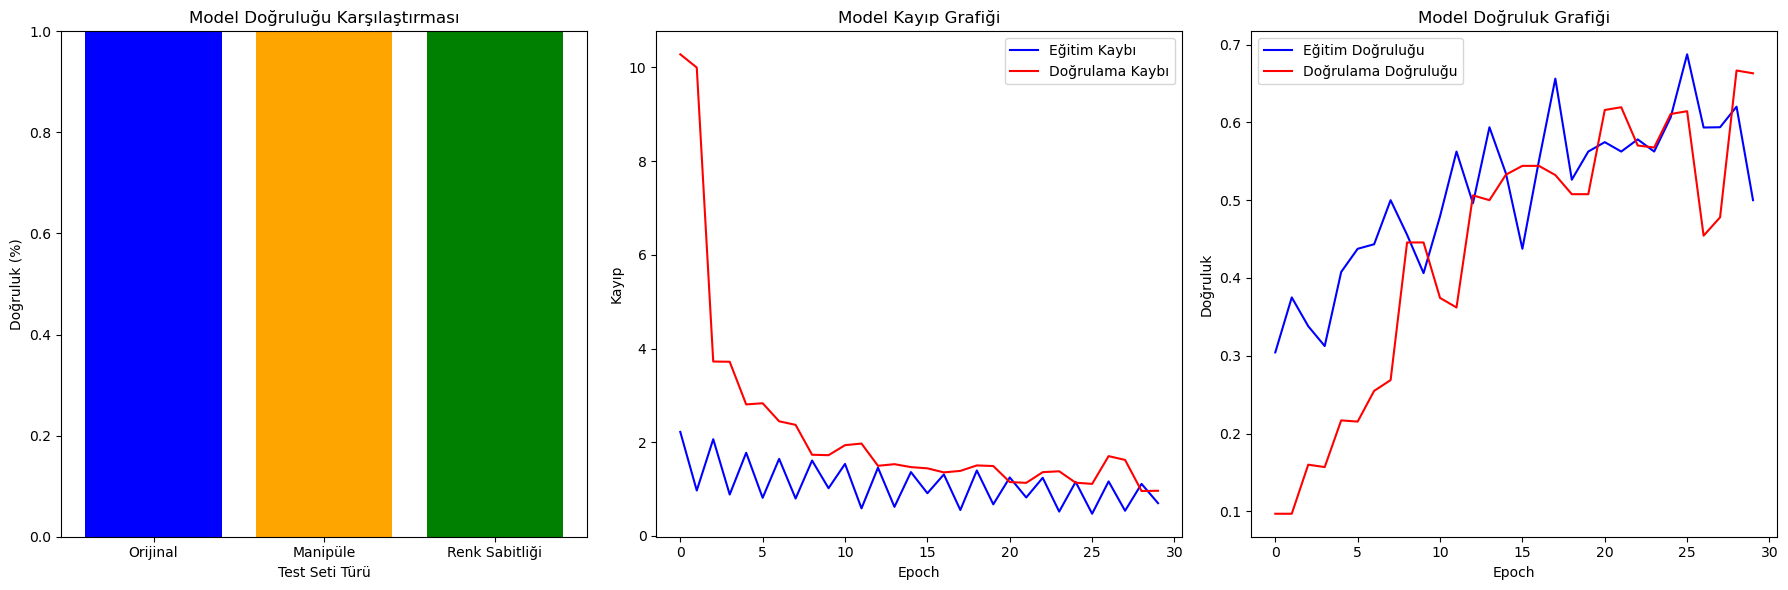

In [12]:
# Sonuçları yazdırma
print("Sonuçlar:")
print(f"Orijinal Test Seti Doğruluğu: {test_accuracy * 100:.2f}%")
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {manipulated_accuracy * 100:.2f}%")
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {corrected_accuracy * 100:.2f}%")
print(f"Gray World Algoritması Uygulanmış Test Seti Doğruluğu: {corrected_accuracy_v2 * 100:.2f}%")

# Sonuçları görselleştirme
import matplotlib.pyplot as plt

# Yan yana grafikler için bir figür oluşturma
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Doğruluk Karşılaştırması Grafiği
axes[0].bar(labels, accuracies, color=['blue', 'orange', 'green'])
axes[0].set_title("Model Doğruluğu Karşılaştırması")
axes[0].set_xlabel("Test Seti Türü")
axes[0].set_ylabel("Doğruluk (%)")
axes[0].set_ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla

# Kayıp Grafiği (Eğitim ve Doğrulama)
axes[1].plot(history.history['loss'], label='Eğitim Kaybı', color='blue')
axes[1].plot(history.history['val_loss'], label='Doğrulama Kaybı', color='red')
axes[1].set_title('Model Kayıp Grafiği')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Kayıp')
axes[1].legend()

# Doğruluk Grafiği (Eğitim ve Doğrulama)
axes[2].plot(history.history['accuracy'], label='Eğitim Doğruluğu', color='blue')
axes[2].plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', color='red')
axes[2].set_title('Model Doğruluk Grafiği')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Doğruluk')
axes[2].legend()

# Grafiklerin düzenlenmesi
plt.tight_layout()
plt.show()
